# Baseline Model w/ only numerical data

## 1. Import Dependencies

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler, MinMaxScaler # Use RobustScaler if data has a lot of outliers
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## 2. Import Dataset

In [2]:
df = pd.read_csv('../data/customers_100k.csv', sep='|') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   account_id                       100000 non-null  object 
 1   country_name                     100000 non-null  object 
 2   account_category                 100000 non-null  object 
 3   bi_account_classification        100000 non-null  object 
 4   customer_type                    100000 non-null  object 
 5   region                           100000 non-null  object 
 6   sic_code                         100000 non-null  int64  
 7   employee_number                  100000 non-null  int64  
 8   revenue_in_eur                   100000 non-null  float64
 9   number_distinct_active_licenses  100000 non-null  int64  
 10  major_edition                    100000 non-null  object 
 11  total_connections_12m            100000 non-null  int64  
 12  tot

In [4]:
df.head()

,account_id,country_name,account_category,bi_account_classification,customer_type,region,sic_code,employee_number,revenue_in_eur,number_distinct_active_licenses,...,total_connections_12m,total_endpoints_12m,total_devices_12m,last_invoice_date_created,current_sales_channel,age_customer,number_renewals,account_value_in_eur,billings_ltm_prorated,business_model
0,ac6a99474410f1c59c91da3f0cf9cf3f,Tonga,Standard,Inside Sales,Customer,APAC,7381,8,1502000.0,1,...,54,4,2,2023-11-23 01:57:47,Webshop,6,5,2532.84,466.47,S
1,1cc66628ed41f3db5a55195e93277a04,Costa Rica,Standard,Inside Sales,Customer,AMERICAS,5049,11,1814000.0,1,...,3385,158,51,2023-10-07 19:35:11,Webshop,1,0,1298.15,972.57,S
2,db5f3cdd5629b9591b720b9b7e077df2,Costa Rica,Standard,Inside Sales,Customer,AMERICAS,7389,16,13444000.0,1,...,12,2,2,2023-12-02 02:03:05,Webshop,2,1,155.83,76.69,S
3,bebb4028688f519f36ed220855b0a62f,Costa Rica,Standard,Reseller,End-User Reseller,AMERICAS,8711,36,7066000.0,3,...,1724,206,30,2023-10-25 23:32:46,Inside Sales,7,5,7550.16,1088.58,S
4,507c0bfb67895d773e3f8bd33b861d09,Costa Rica,Standard,Inside Sales,Customer,AMERICAS,6531,312,61054000.0,2,...,6493,611,31,2023-11-17 04:16:51,Inside Sales,10,1,4688.33,1593.70,S


## 3. Data Preprocessing

In [5]:
# Separate numerical features
num_data = df.select_dtypes(include=['float64', 'int64'])

# Combining the account_id column and numerical features
id_column = df['account_id']
data = pd.concat([id_column, num_data], axis=1)

# Drop sic_code column
data.drop(columns=['sic_code'], inplace=True)

In [6]:
data

,account_id,employee_number,revenue_in_eur,number_distinct_active_licenses,total_connections_12m,total_endpoints_12m,total_devices_12m,age_customer,number_renewals,account_value_in_eur,billings_ltm_prorated
0,ac6a99474410f1c59c91da3f0cf9cf3f,8,1502000.0,1,54,4,2,6,5,2532.84,466.47
1,1cc66628ed41f3db5a55195e93277a04,11,1814000.0,1,3385,158,51,1,0,1298.15,972.57
2,db5f3cdd5629b9591b720b9b7e077df2,16,13444000.0,1,12,2,2,2,1,155.83,76.69
3,bebb4028688f519f36ed220855b0a62f,36,7066000.0,3,1724,206,30,7,5,7550.16,1088.58
4,507c0bfb67895d773e3f8bd33b861d09,312,61054000.0,2,6493,611,31,10,1,4688.33,1593.70
...,...,...,...,...,...,...,...,...,...,...,...
99995,7396a9c9504211ce55073ace6c8d4913,50,9450000.0,2,1290,10,4,4,6,4390.97,1111.10
99996,8d680e3cfa74cc08e8268254e99e1f48,12,2336000.0,3,58,18,7,10,6,11593.84,1522.02
99997,6449e4ad632b62eae4f4f7708d257a9e,27,5229000.0,1,76,2,2,4,3,2205.64,571.51
99998,973778c47a7242c7e150f5ac7172dc10,4,352000.0,1,92,3,7,2,1,163.36,78.70


In [7]:
# Extract features columns excluding 'account_id'
clustering_base = data.drop(columns=['account_id'])

In [8]:
clustering_features = clustering_base.columns
clustering_features

Index(['employee_number', 'revenue_in_eur', 'number_distinct_active_licenses',
       'total_connections_12m', 'total_endpoints_12m', 'total_devices_12m',
       'age_customer', 'number_renewals', 'account_value_in_eur',
       'billings_ltm_prorated'],
      dtype='object')

In [9]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(clustering_base)

In [10]:
# statistics of scaled data
pd.DataFrame(scaled_features)

,0,1,2,3,4,5,6,7,8,9
0,0.000013,3.407323e-06,0.000000,0.000046,0.000038,0.000076,0.294118,0.023585,0.001077,0.000670
1,0.000018,4.115104e-06,0.000000,0.002967,0.002010,0.003819,0.000000,0.000000,0.000552,0.001398
2,0.000028,3.049806e-05,0.000000,0.000010,0.000013,0.000076,0.058824,0.004717,0.000066,0.000109
3,0.000064,1.602940e-05,0.012987,0.001511,0.002625,0.002215,0.352941,0.023585,0.003210,0.001565
4,0.000573,1.385026e-04,0.006494,0.005692,0.007810,0.002291,0.529412,0.004717,0.001993,0.002292
...,...,...,...,...,...,...,...,...,...,...
99995,0.000090,2.143757e-05,0.006494,0.001130,0.000115,0.000229,0.176471,0.028302,0.001867,0.001598
99996,0.000020,5.299274e-06,0.012987,0.000050,0.000218,0.000458,0.529412,0.028302,0.004929,0.002189
99997,0.000048,1.186212e-05,0.000000,0.000066,0.000013,0.000076,0.176471,0.014151,0.000938,0.000821
99998,0.000006,7.985188e-07,0.000000,0.000080,0.000026,0.000458,0.058824,0.004717,0.000069,0.000112


## Determine the number of clusters(k)

In [11]:
# Define a range of k values to test
k_range = range(1, 20)

wcss = []
for k in k_range:
    print('Now on k {}'.format(k))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_features)
    wcss.append(kmeans.inertia_)

Now on k 1
Now on k 2
Now on k 3
Now on k 4
Now on k 5
Now on k 6
Now on k 7
Now on k 8
Now on k 9
Now on k 10
Now on k 11
Now on k 12
Now on k 13
Now on k 14
Now on k 15
Now on k 16
Now on k 17
Now on k 18
Now on k 19


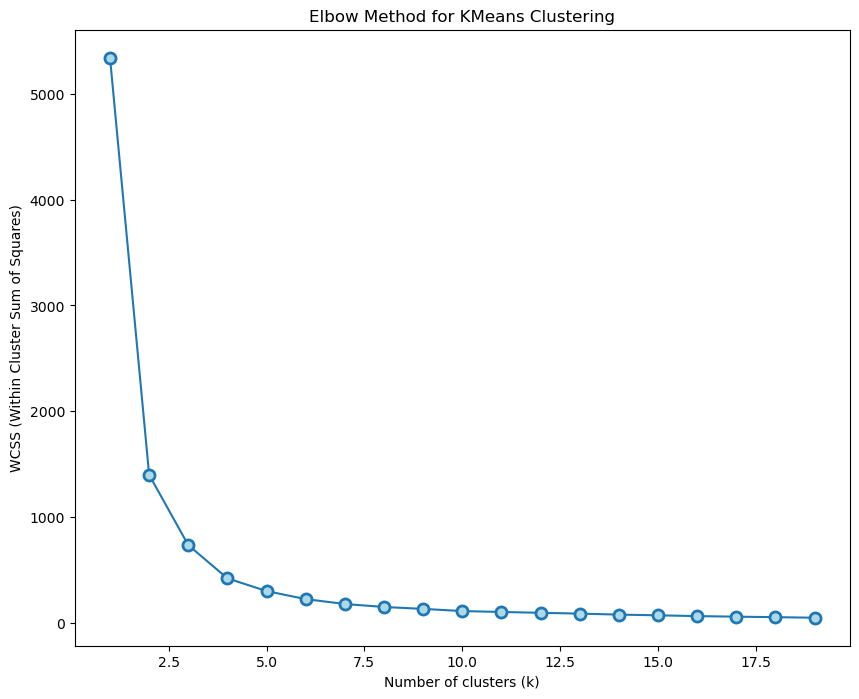

In [12]:
# Plotting WCSS vs k to identify the elbow point
plt.figure(figsize=(10, 8))
plt.plot(k_range, wcss, 'o-', markerfacecolor='lightblue', markeredgewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

## Modeling

In [17]:
# Assuming k based on the Elbow Method
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)

clustering_base['cluster_kmeans'] = kmeans.predict(scaled_features)

scaled_df = pd.DataFrame(scaled_features, 
                         columns=data[clustering_features].columns,
                         index=clustering_base.index)

scaled_df['cluster_kmeans'] = clustering_base['cluster_kmeans']

In [18]:
clustering_base.groupby(['cluster_kmeans']).mean()

,employee_number,revenue_in_eur,number_distinct_active_licenses,total_connections_12m,total_endpoints_12m,total_devices_12m,age_customer,number_renewals,account_value_in_eur,billings_ltm_prorated
cluster_kmeans,,,,,,,,,,
0,474.860901,2.284850e+08,1.067702,898.663878,75.749288,13.716207,2.859797,1.823714,2186.217621,796.966871
1,196.325749,6.704274e+07,2.743740,3769.673151,434.614928,36.654095,12.487084,5.538705,11335.510558,1626.173474
2,176.336996,5.496047e+07,1.581280,1638.986532,155.411699,20.197379,6.448711,4.729954,5277.285482,1063.091386


In [19]:
clustering_base.cluster_kmeans.value_counts()

0    38965
2    38312
1    22723
Name: cluster_kmeans, dtype: int64

In [20]:
clustering_base.mean()

employee_number                    2.971989e+02
revenue_in_eur                     1.253197e+08
number_distinct_active_licenses    1.645310e+00
total_connections_12m              1.834676e+03
total_endpoints_12m                1.878146e+02
total_devices_12m                  2.141145e+01
age_customer                       6.422390e+00
number_renewals                    3.781310e+00
account_value_in_eur               5.449461e+03
billings_ltm_prorated              1.087345e+03
cluster_kmeans                     9.934700e-01
dtype: float64

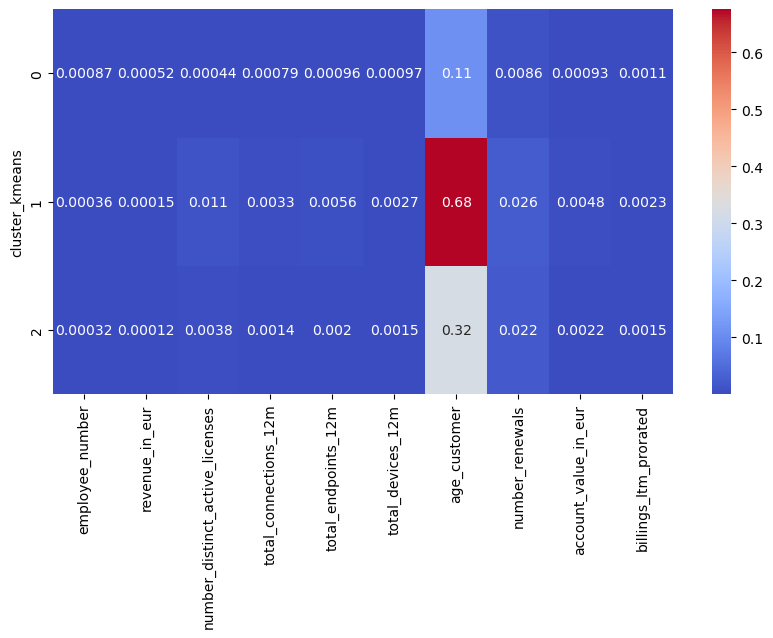

In [24]:
# Visualize the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(scaled_df.groupby(['cluster_kmeans']).mean(), cmap='coolwarm', annot=True)
plt.show()

In [30]:
clusters=pd.DataFrame(scaled_features, columns=clustering_base.drop(columns='cluster_kmeans').columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig.show()

c:\Users\luis\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
c:\Users\luis\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
c:\Users\luis\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


## 5. Evaluation

### 5.1. KMeans

In [52]:
silhouette_score(features_scaled, cluster_labels)

0.41163754126815194

In [64]:
data['cluster'] = cluster_labels

data

,account_id,companydataprovider_employeenumber,companydataprovider_revenue_in_eur,number_distinct_active_licenses,total_connections_12m,total_endpoints_12m,total_devices_12m,days_from_last_invoice,age_customer,number_renewals,number_total_invoices,account_value_in_eur,revenue_last_12_month,years_purchased,billings_ltm_prorated,cluster
2,8451D3C3-FC1A-E411-80D3-005056846F2F,52.0,15379307.0,3,3349,611,21,85,13,2,6,5884.78,1157.72,12106,1157.72,1
3,B6B0B074-213F-ED11-9DB0-000D3ADEAD35,3.0,82742.0,1,78,4,2,57,1,1,2,861.84,478.80,4045,478.80,0
4,3151AAFA-F21A-E411-80D3-005056846F2F,242.0,15454197.0,1,243,33,3,149,12,5,7,3538.54,533.25,14134,533.25,1
5,7CA97D7A-A1F0-EC11-BB3D-000D3AB57339,7.0,830000.0,1,944,5,7,157,1,1,2,311.79,152.72,4045,152.72,0
7,FFE48D4C-A666-EA11-A811-000D3AB11761,21.0,985411.0,1,0,0,0,254,3,3,4,475.20,118.80,8086,118.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,9DC5CDED-C898-ED11-AAD1-000D3ADEA83D,9.0,3111000.0,1,297,7,16,161,0,0,2,266.42,266.42,4046,266.42,0
49973,D0B6E4F9-E81A-E411-80D3-005056846F2F,105.0,18900000.0,3,3512,1578,168,185,13,7,12,34539.78,4914.17,24205,4914.15,1
49981,8CD2F113-BF75-EB11-A812-000D3AB25E8C,7.0,930779.0,1,561,9,2,272,2,2,3,1109.12,391.52,6066,391.52,0
49994,95C51C1D-A4D6-E711-80EF-005056844077,5.0,954000.0,2,775,89,22,293,10,4,15,28771.99,4683.27,24215,4683.26,1
